## Agglomerative Clustering

<img src="applsci-13-00342-g001.webp" alt="text_clustering">

### Imports

In [1]:
# !pip install kneed

In [11]:
### -------------------
### Importing libraries
### -------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans,AgglomerativeClustering

from kneed import KneeLocator

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

import string

## Input data

Dataset : bbc-news-data.txt

location : https://mitu.co.in/dataset

In [12]:
### ----------
### input data
### ----------



with open ('bbc-text-data.csv', 'r') as fh:
    
    data = fh.readlines()


    
print(len(data))

2225


In [13]:
# Initializing the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [18]:
# Tranforming the data
x_vect = tfidf.fit_transform(data)
x_vect.shape

(2225, 29126)

# Build the model

In [30]:
from scipy.cluster.hierarchy import linkage

In [33]:
km=AgglomerativeClustering(n_clusters=5)

In [34]:
labels=km.fit_predict(x_vect.toarray())

In [35]:
labels

array([4, 0, 0, ..., 0, 0, 0])

In [36]:
km.labels_

array([4, 0, 0, ..., 0, 0, 0])

In [37]:
len(labels)

2225

In [45]:
pd.Series(labels).value_counts().to_dict()

{0: 1121, 4: 368, 2: 365, 1: 225, 3: 146}

In [38]:
df=pd.DataFrame(data,columns=["text"])
df

,text
0,tv future in the hands of viewers with home th...
1,worldcom boss left books alone former worldc...
2,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...
4,ocean s twelve raids box office ocean s twelve...
...,...
2220,cars pull down us retail figures us retail sal...
2221,kilroy unveils immigration policy ex-chatshow ...
2222,rem announce new glasgow concert us band rem h...
2223,how political squabbles snowball it s become c...


In [39]:
print('0:',len(df[labels==0]))
print('1:',len(df[labels==1]))
print('2:',len(df[labels==2]))
print('3:',len(df[labels==3]))
print('4:',len(df[labels==4]))

0: 1121
1: 225
2: 365
3: 146
4: 368


# Find the most frequent word in Cluster2

In [40]:
stop = stopwords.words('english')

In [41]:
def most_common_from_cluster(df : pd.DataFrame):

    df = list(df['text'])

    df = " ".join(df)

    tokens1 = word_tokenize(df)

    tokens2=[word for word in tokens1 if word not in string.punctuation]

    tokens3=[word.lower( )for word in tokens2 if word.lower() not in stop]

    freq = FreqDist(tokens3)

    freq.plot(10, cumulative=False)

    print(freq.most_common(10))
    
    print()

In [42]:
df_0 = df[labels==0]

most frequent words of Cluster labeled as  : 0


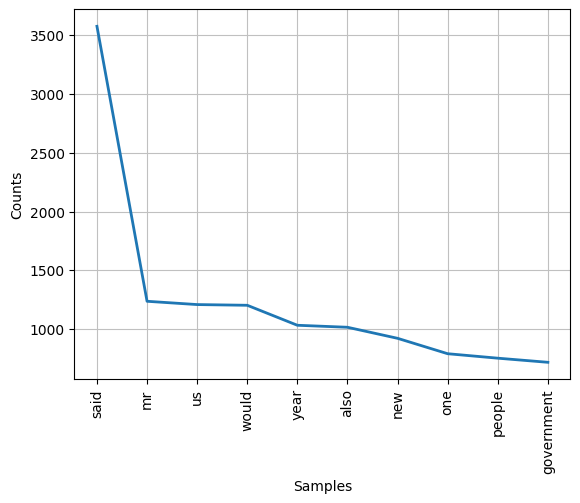

[('said', 3576), ('mr', 1237), ('us', 1209), ('would', 1203), ('year', 1033), ('also', 1016), ('new', 922), ('one', 791), ('people', 753), ('government', 718)]

most frequent words of Cluster labeled as  : 1


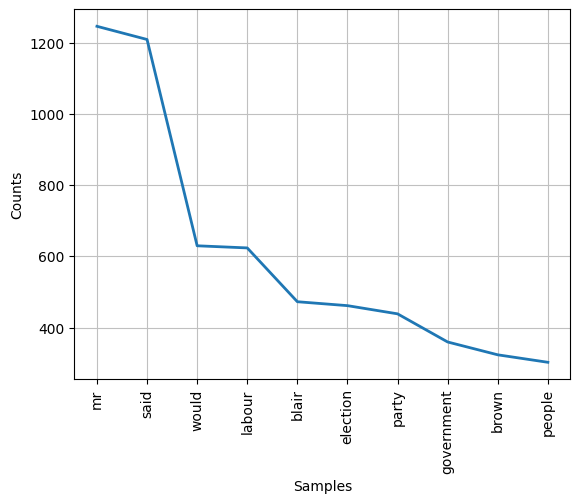

[('mr', 1246), ('said', 1209), ('would', 630), ('labour', 624), ('blair', 473), ('election', 462), ('party', 439), ('government', 360), ('brown', 324), ('people', 303)]

most frequent words of Cluster labeled as  : 2


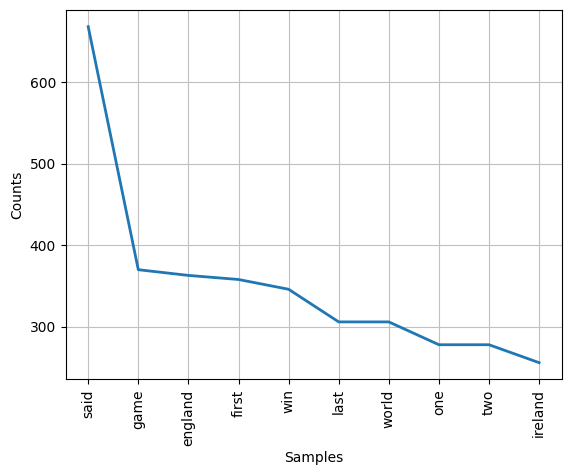

[('said', 668), ('game', 370), ('england', 363), ('first', 358), ('win', 346), ('last', 306), ('world', 306), ('one', 278), ('two', 278), ('ireland', 256)]

most frequent words of Cluster labeled as  : 3


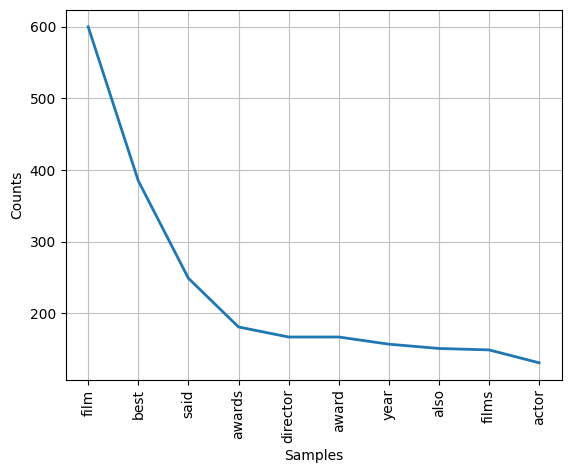

[('film', 600), ('best', 385), ('said', 249), ('awards', 181), ('director', 167), ('award', 167), ('year', 157), ('also', 151), ('films', 149), ('actor', 131)]

most frequent words of Cluster labeled as  : 4


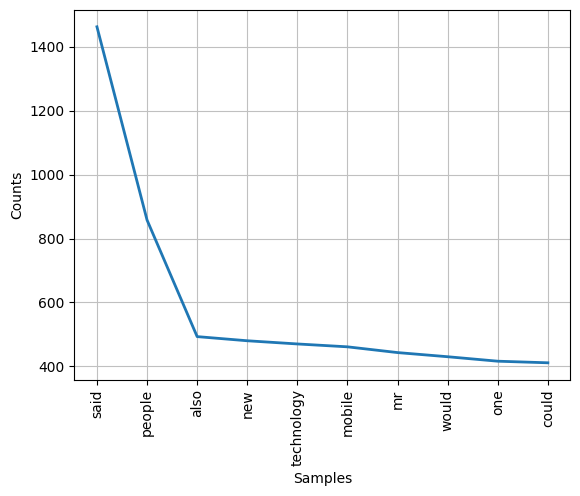

[('said', 1463), ('people', 858), ('also', 493), ('new', 480), ('technology', 470), ('mobile', 461), ('mr', 443), ('would', 430), ('one', 416), ('could', 411)]



In [43]:
# Finding most frequent words in each cluster

for i in range(5):
    
    df_new = df[labels == i]
    
    print('most frequent words of Cluster labeled as  :',i)
    
    most_common_from_cluster(df_new)